In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("movies.dat", delimiter='::')

C:\Users\RITUJA\AppData\Local\Temp\ipykernel_11460\3775472292.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv("movies.dat", delimiter='::')


In [4]:
df

,0000008,Edison Kinetoscopic Record of a Sneeze (1894),Documentary|Short
0,10,La sortie des usines Lumière (1895),Documentary|Short
1,12,The Arrival of a Train (1896),Documentary|Short
2,25,The Oxford and Cambridge University Boat Race ...,NaN
3,91,Le manoir du diable (1896),Short|Horror
4,131,Une nuit terrible (1896),Short|Comedy|Horror
...,...,...,...
37336,14499632,22 vs. Earth (2021),Animation|Short|Adventure
37337,14527836,Recalled (2021),Drama|Mystery|Thriller
37338,14544192,Bo Burnham: Inside (2021),Comedy|Drama|Music
37339,14735160,Mum is Pregnant (2021),NaN


In [5]:
df.columns = ['ID', 'title', 'genre']

In [6]:
df.head()

,ID,title,genre
0,10,La sortie des usines Lumière (1895),Documentary|Short
1,12,The Arrival of a Train (1896),Documentary|Short
2,25,The Oxford and Cambridge University Boat Race ...,NaN
3,91,Le manoir du diable (1896),Short|Horror
4,131,Une nuit terrible (1896),Short|Comedy|Horror


In [7]:
rate = pd.read_csv("ratings.dat", delimiter='::')

C:\Users\RITUJA\AppData\Local\Temp\ipykernel_11460\2067435158.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  rate = pd.read_csv("ratings.dat", delimiter='::')


In [8]:
rate.head()

,1,0114508,8,1381006850
0,2,499549,9,1376753198
1,2,1305591,8,1376742507
2,2,1428538,1,1371307089
3,3,75314,1,1595468524
4,3,102926,9,1590148016


In [9]:
rate.columns = ["User", "ID", "Rating", "Timestamp"]

In [10]:
rate

,User,ID,Rating,Timestamp
0,2,499549,9,1376753198
1,2,1305591,8,1376742507
2,2,1428538,1,1371307089
3,3,75314,1,1595468524
4,3,102926,9,1590148016
...,...,...,...,...
906825,70781,9893250,10,1613857551
906826,70781,9898858,3,1585958452
906827,70782,172495,10,1587107015
906828,70782,414387,10,1587107852


In [11]:
db = pd.merge(df, rate, on = ["ID", "ID"])

In [12]:
db

,ID,title,genre,User,Rating,Timestamp
0,10,La sortie des usines Lumière (1895),Documentary|Short,70577,10,1412878553
1,12,The Arrival of a Train (1896),Documentary|Short,69535,10,1439248579
2,25,The Oxford and Cambridge University Boat Race ...,NaN,37628,8,1488189899
3,91,Le manoir du diable (1896),Short|Horror,5814,6,1385233195
4,91,Le manoir du diable (1896),Short|Horror,37239,5,1532347349
...,...,...,...,...,...,...
908627,14544192,Bo Burnham: Inside (2021),Comedy|Drama|Music,55241,10,1622416491
908628,14544192,Bo Burnham: Inside (2021),Comedy|Drama|Music,57060,10,1623092790
908629,14544192,Bo Burnham: Inside (2021),Comedy|Drama|Music,68109,3,1622844954
908630,14735160,Mum is Pregnant (2021),NaN,19702,9,1622798273


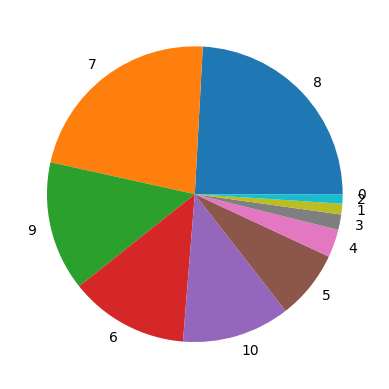

In [13]:
ratings = db["Rating"].value_counts()
num = ratings.index
quantity = ratings.values
import matplotlib.pyplot as plt
fig = plt.pie(quantity, labels=num)
plt.show()

In [17]:
#movies with 10 rating 
r10 = db.query("Rating == 10")
print(r10["title"].value_counts().head(10))

Joker (2019)                       1479
Interstellar (2014)                1386
1917 (2019)                         820
Avengers: Endgame (2019)            812
The Shawshank Redemption (1994)     707
Gravity (2013)                      653
The Wolf of Wall Street (2013)      581
Hacksaw Ridge (2016)                570
Avengers: Infinity War (2018)       535
La La Land (2016)                   510
Name: title, dtype: int64


<AxesSubplot: >

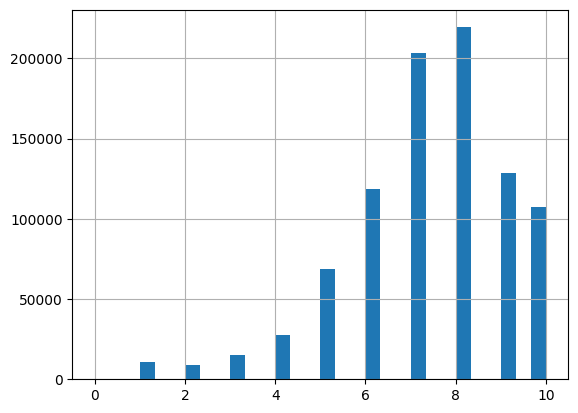

In [19]:
#histogram to show the numbers for each ratings
db['Rating'].hist(bins=30)

In [20]:
dummies = db['genre'].str.get_dummies()
dummies.head()

,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [21]:
#since timestamp is of not affecting the data we are dropping it and we are dropping the genre but adding a dummy genre which clearly states the genre
movie_rat = (pd.concat([db, dummies], axis=1).drop(["Timestamp", "genre"], axis=1))

In [22]:
movie_rat.head()

,ID,title,User,Rating,Action,Adult,Adventure,Animation,Biography,Comedy,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,10,La sortie des usines Lumière (1895),70577,10,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,12,The Arrival of a Train (1896),69535,10,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,25,The Oxford and Cambridge University Boat Race ...,37628,8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,91,Le manoir du diable (1896),5814,6,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,91,Le manoir du diable (1896),37239,5,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [23]:
#seperating the production year from the movie name and creating a separate column
movie_rat["production_year"] = movie_rat["title"].str[-5:-1]
movie_rat["title"] = movie_rat["title"].str[:-7]

In [24]:
movie_rat.head(10)

,ID,title,User,Rating,Action,Adult,Adventure,Animation,Biography,Comedy,...,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western,production_year
0,10,La sortie des usines Lumière,70577,10,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1895
1,12,The Arrival of a Train,69535,10,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1896
2,25,The Oxford and Cambridge University Boat Race,37628,8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1895
3,91,Le manoir du diable,5814,6,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1896
4,91,Le manoir du diable,37239,5,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1896
5,91,Le manoir du diable,54465,7,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1896
6,131,Une nuit terrible,68887,7,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1896
7,417,A Trip to the Moon,3600,9,1,0,1,0,0,1,...,0,0,1,1,0,0,0,0,0,1902
8,417,A Trip to the Moon,4009,7,1,0,1,0,0,1,...,0,0,1,1,0,0,0,0,0,1902
9,417,A Trip to the Moon,5009,9,1,0,1,0,0,1,...,0,0,1,1,0,0,0,0,0,1902


In [25]:
#reseting the index
movie_rat.reset_index(inplace=True)
movie_rat.head(2)

,index,ID,title,User,Rating,Action,Adult,Adventure,Animation,Biography,...,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western,production_year
0,0,10,La sortie des usines Lumière,70577,10,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1895
1,1,12,The Arrival of a Train,69535,10,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1896


In [29]:
#here we are counting the number of movie each year till date
yr = movie_rat["production_year"].astype(int)<2023

prodcount = (movie_rat[yr][["production_year", "ID"]]
            .groupby("production_year")
            .count()
            )

In [30]:
prodcount.tail()

,ID
production_year,
2017,63196
2018,45164
2019,52932
2020,12614
2021,3712


<AxesSubplot: title={'center': 'Count of Rated Movies - by production year'}, xlabel='production_year'>

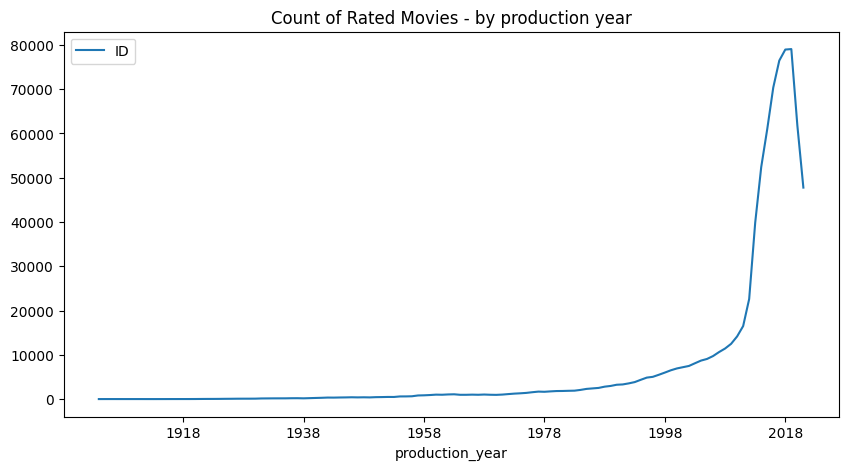

In [33]:
(prodcount.rolling(7).mean().rename(columns={"movie_id":"count"})
.plot(figsize=(10, 5), title="Count of Rated Movies - by production year"))

In [34]:
#top 6 genres by the total number of movies 
top6 = (movie_rat.iloc[:, 4:-1]
       .sum()
       .sort_values(ascending=False)
       .head(6)
       .index.values
       )

In [35]:
top6

array(['Rating', 'Drama', 'Thriller', 'Action', 'Comedy', 'Adventure'],
      dtype=object)

In [38]:
genre_grps = (movie_rat.iloc[:, 4:]
             .groupby("production_year")
             .sum()
             ).loc["2000":"2018",top6]

<AxesSubplot: title={'center': 'Total Rated Films'}, xlabel='production_year'>

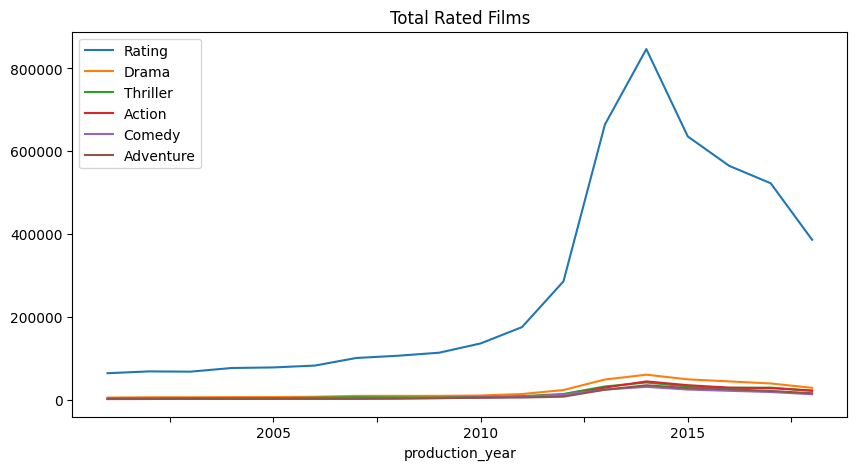

In [39]:
genre_grps.rolling(2).mean().plot(figsize=(10,5), title="Total Rated Films")

In [40]:
genre_grps = (movie_rat.iloc[:, 4:]
             .groupby("production_year")
             .sum()
              .pct_change(periods=2)
             ).loc["2000":"2018",top6]

<AxesSubplot: title={'center': 'Total Rated Films'}, xlabel='production_year'>

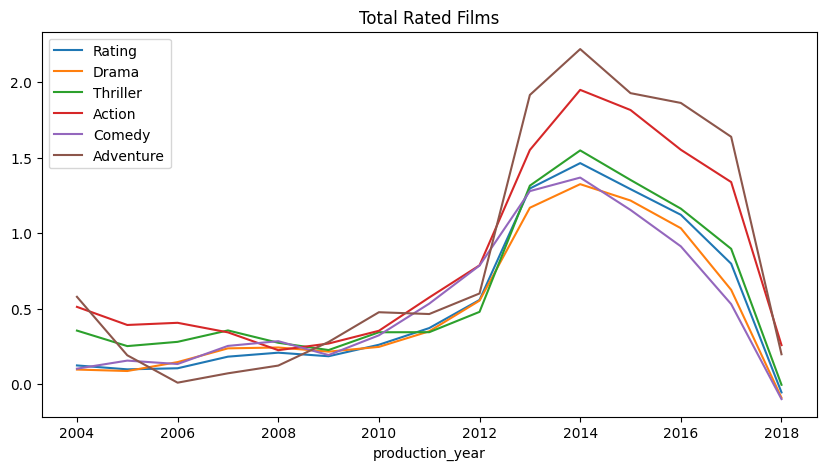

In [41]:
genre_grps.rolling(5).mean().plot(figsize=(10,5), title="Total Rated Films")

In [42]:
cols = ["title", "Rating", "production_year", "Sci-Fi", "ID"]
con0 = movie_rat["production_year"].astype(int)<2020
con1 = movie_rat["Sci-Fi"] == 1
scifi = (movie_rat[cols][con0&con1].drop("Sci-Fi", axis=1))
scifi["decade"] = scifi['production_year'].astype(int)//10*10

In [43]:
scifi.head()

,title,Rating,production_year,ID,decade
7,A Trip to the Moon,9,1902,417,1900
8,A Trip to the Moon,7,1902,417,1900
9,A Trip to the Moon,9,1902,417,1900
10,A Trip to the Moon,9,1902,417,1900
11,A Trip to the Moon,7,1902,417,1900


In [45]:
count_grp = scifi.groupby("ID").count()["Rating"]
movie_list = count_grp[count_grp>10].index.values
movie_list[:5]

array([  417, 17136, 21884, 24184, 24216], dtype=int64)

In [46]:
con = scifi["ID"].isin(movie_list)
col = ["title", "decade", "Rating"]
scifi_filtered = scifi[con][col]

In [47]:
top_rated = (scifi_filtered
            .groupby(["decade", "title"])
            .mean()
            .sort_values(["decade", "Rating"],ascending=False)
             .groupby(level=0, as_index=False)
             .apply(lambda x: x.head() if len(x) >= 5 else x.head(1))
             .reset_index(level=0, drop=True)).round(2)


In [48]:
top_rated

Rating
decade title                                                     
1900   A Trip to the Moon                                    8.48
1920   Metropolis                                            8.72
1930   King Kong                                             8.64
1950   Forbidden Planet                                      8.40
       The Day the Earth Stood Still                         8.32
       Invasion of the Body Snatchers                        8.05
       Kiss Me Deadly                                        8.00
       Creature from the Black Lagoon                        7.91
1960   La jetée                                              8.54
       Planet of the Apes                                    8.31
       The Time Machine                                      8.20
       2001: A Space Odyssey                                 8.14
       Alphaville, une étrange aventure de Lemmy Caution     7.63
1970   Alien                                                 8.43
       A Clockwork Orange                                    8.34
       Star Wars                                             8.34
       Solaris                                               8.31
       Stalker                                               8.17
1980   Back to the Future                                    8.92
       The Return of the Living Dead                         8.71
       Star Wars: Episode V - The Empire Strikes Back        8.67
       Aliens                                                8.63
       E.T. the Extra-Terrestrial                            8.45
1990   Terminator 2: Judgment Day                            9.10
       Gekijô-ban poketto monsutâ - Myûtsû no gyakushû       8.83
       Shin seiki Evangelion Gekijô-ban: Air/Magokoro ...    8.65
       The Matrix                                            8.59
       The Truman Show                                       8.54
2000   Cowboy Bebop: Tengoku no tobira                       9.13
       The Prestige                                          8.90
       WALL·E                                                8.70
       V for Vendetta                                        8.44
       Banlieue 13                                           8.32
2010   Avengers: Endgame                                     9.05
       Inception                                             9.03
       Interstellar                                          8.84
       Avengers: Infinity War                                8.76
       Spider-Man: Into the Spider-Verse                     8.57

In [49]:
top_rated.loc[1990:]

Rating
decade title                                                     
1990   Terminator 2: Judgment Day                            9.10
       Gekijô-ban poketto monsutâ - Myûtsû no gyakushû       8.83
       Shin seiki Evangelion Gekijô-ban: Air/Magokoro ...    8.65
       The Matrix                                            8.59
       The Truman Show                                       8.54
2000   Cowboy Bebop: Tengoku no tobira                       9.13
       The Prestige                                          8.90
       WALL·E                                                8.70
       V for Vendetta                                        8.44
       Banlieue 13                                           8.32
2010   Avengers: Endgame                                     9.05
       Inception                                             9.03
       Interstellar                                          8.84
       Avengers: Infinity War                                8.76
       Spider-Man: Into the Spider-Verse                     8.57